In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data_file = pd.read_csv("processed_data.csv", sep=';')

In [58]:
#заменим исходы на 0 и 1, где 0 - умер, 1 - выписан
data_file['Outcome'] = np.where(data_file['Outcome'].str.contains('Умер'),0,1)
#Разделяем нашу табличку по столбцу TherapyApply:
with_therapy = data_file[data_file['TherapyApply'] == 1]
without_therapy = data_file[data_file['TherapyApply'] == 0]

In [59]:
#некоторые статистики
without_therapy.describe()

,CaseID,Age,Outcome,TherapyApply,Результат_F,Результат_D,Meds
count,6047.000000,6047.000000,6047.00000,6047.0,6047.000000,6047.000000,6047.000000
mean,354468.800397,65.485861,0.78171,0.0,728.585168,1039.773030,0.005292
std,82337.902434,17.167784,0.41312,0.0,533.455632,1350.899749,0.072559
min,731.000000,18.000000,0.00000,0.0,1.190000,0.100000,0.000000
25%,380383.000000,55.000000,1.00000,0.0,272.750000,254.175000,0.000000
50%,383289.000000,68.000000,1.00000,0.0,601.700000,486.700000,0.000000
75%,386649.000000,80.000000,1.00000,0.0,1082.000000,1157.000000,0.000000
max,390866.000000,100.000000,1.00000,0.0,4662.000000,9000.000000,1.000000


In [60]:
with_therapy.describe()

,CaseID,Age,Outcome,TherapyApply,Результат_F,Результат_D,Meds
count,2451.000000,2451.000000,2451.000000,2451.0,2451.000000,2451.000000,2451.000000
mean,355919.730314,64.144023,0.742962,1.0,900.542795,833.621612,0.101999
std,79554.380208,15.081468,0.437090,0.0,548.805772,1106.402081,0.302709
min,66.000000,22.000000,0.000000,1.0,1.000000,4.700000,0.000000
25%,380990.500000,54.000000,0.000000,1.0,434.600000,246.650000,0.000000
50%,384198.000000,66.000000,1.000000,1.0,873.200000,428.700000,0.000000
75%,386604.500000,75.000000,1.000000,1.0,1318.000000,853.600000,0.000000
max,390206.000000,99.000000,1.000000,1.0,3154.000000,9000.000000,1.000000


In [61]:
#высчитываем статистики:
def find_statistic(table, name):
    statistics= {
        'Group' : name,
        'Count' : len(table),
        '% Male': (table['Gender'].value_counts(normalize=True).get('м') * 100).round(2),
        '% Female': (table['Gender'].value_counts(normalize=True).get('ж') * 100).round(2),
        'Mean Age': table['Age'].mean().round(2),
        '% Mortality': (table['Outcome'].value_counts(normalize=True).get(0) * 100)
        }
    return statistics


In [62]:
# Расчет статистики для обеих групп
stats_1 = find_statistic(with_therapy, 'Therapy Applied')
stats_0 = find_statistic(without_therapy, 'No Therapy')

# Создание DataFrame со статистикой
stats_df = pd.DataFrame([stats_1, stats_0])

# Вывод статистики
print("Statistics:")
print(stats_df)

Statistics:
             Group  Count  % Male  % Female  Mean Age  % Mortality
0  Therapy Applied   2451   43.21     56.79     64.14    25.703794
1       No Therapy   6047   38.75     61.25     65.49    21.829006


In [63]:
#Гендерное распределение
#сливаем нашу статистику в три столбца
gender_data = stats_df.melt(id_vars='Group', value_vars=['% Male', '% Female'], 
                           var_name='Gender', value_name='Percentage')
gender_data.head(10)

,Group,Gender,Percentage
0,Therapy Applied,% Male,43.21
1,No Therapy,% Male,38.75
2,Therapy Applied,% Female,56.79
3,No Therapy,% Female,61.25


Text(0, 0.5, 'Percentage (%)')

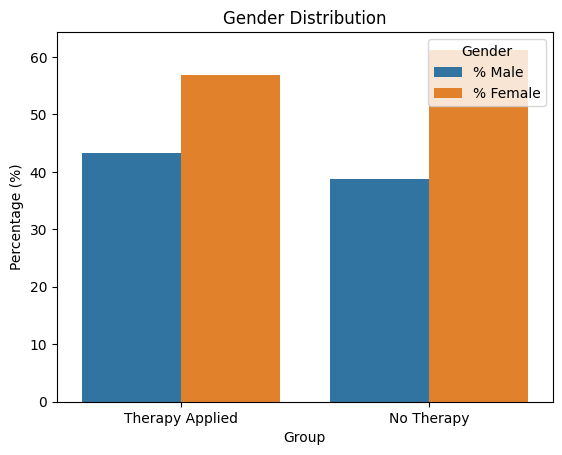

In [64]:
sns.barplot(data=gender_data, x='Group', y='Percentage', hue='Gender')
plt.title('Gender Distribution')
plt.ylabel('Percentage (%)')

(60.933, 65.81745)

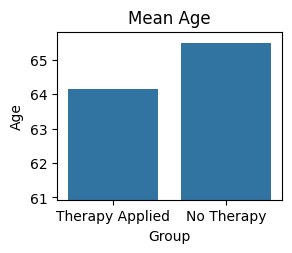

In [65]:
#Средний возраст
plt.subplot(2, 2, 2)
sns.barplot(data=stats_df, x='Group', y='Mean Age')
plt.title('Mean Age')
plt.ylabel('Age')
min_age = stats_df['Mean Age'].min()*0.95
max_age = stats_df['Mean Age'].max() * 1.005
plt.ylim(min_age, max_age)

(19.646105506862906, 28.274173806609554)

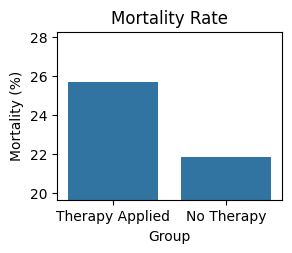

In [66]:
#Смертность
plt.subplot(2, 2, 3)
sns.barplot(data=stats_df, x='Group', y='% Mortality')
plt.title('Mortality Rate')
plt.ylabel('Mortality (%)')
min_mortality = stats_df['% Mortality'].min() * 0.9
max_mortality = stats_df['% Mortality'].max() * 1.1
plt.ylim(min_mortality, max_mortality)